In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
df['PERDIDA_SEGUIMIENTO_N'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df_per = pd.DataFrame(df)
df_per.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df_per.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
numeric_columns.remove('ID')
numeric_columns.remove('PERDIDA_SEGUIMIENTO')
numeric_columns.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = enc.fit_transform(df_per[categoric_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(categoric_columns))

In [ ]:
print(encoded_df.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = enc.fit_transform(df_per[categoric_columns])
scaled_num = scaler.transform(df_per[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Convert the sparse matrix to a DataFrame
encoded_cat_df = pd.DataFrame.sparse.from_spmatrix(encoded_cat,
                                                    index=df.index,
                                                    columns=enc.get_feature_names_out(categoric_columns))
                                                    # Assuming 'enc' is your OneHotEncoder and 'categoric_columns' are your categorical columns


# Now concatenate the DataFrames
df2 = pd.concat([scaled_num_df, encoded_cat_df, df['PERDIDA_SEGUIMIENTO_N']], axis=1)
print(df2['PERDIDA_SEGUIMIENTO_N'].value_counts())

PERDIDA_SEGUIMIENTO_N
0    9364
1     738
Name: count, dtype: int64


In [ ]:
df2.shape

(10102, 50)

In [ ]:
print(df2.columns)

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



In [ ]:
# prompt: generar un modelo de clasificacion bayesiano a partir de df2

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB

# Inicializar el modelo de Naive Bayes
model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {AUC}")


Accuracy: 0.3909600791817882
Precision: 0.09637357178340784
Recall: 0.8778280542986425
F1-Score: 0.17367949865711726
AUC: 0.615248546722275


In [ ]:
# prompt: optimizar hiperparametros del modelo bayesiano model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Import confusion_matrix

# Define the parameter grid to search
param_grid = {
    # No hyperparameters to tune for GaussianNB
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='recall', cv=10, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = 2 * (precision * recall) / (precision + recall)
AUC = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"F2-Score: {f2}")
print(f"AUC: {AUC}")
cm1 = confusion_matrix(y_test, y_pred)

Best Parameters: {}
Best Score: 0.8202525252525253
Accuracy: 0.36219693221177635
Precision: 0.0945273631840796
Recall: 0.8986486486486487
F1-Score: 0.17106109324758842
F2-Score: 0.17106109324758842
AUC: 0.609228221814981


In [ ]:
cm1 = confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

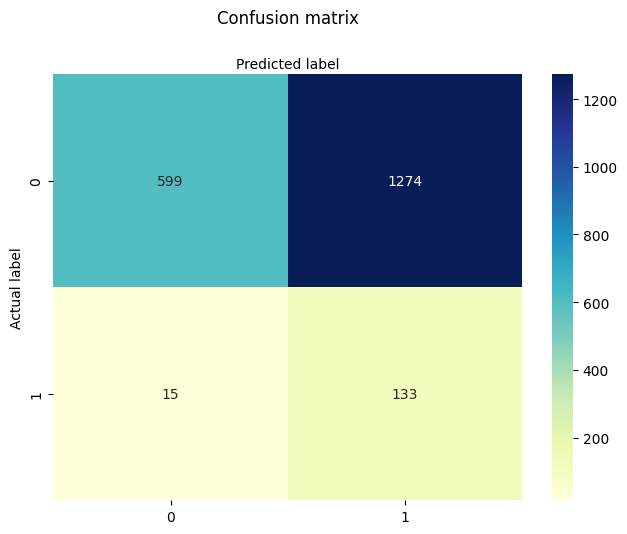

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall, precision, f1, accuracy, AUC)]

model_NB = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
model_NB.insert(0, 'NaiveBayes with ', 'None')
model_NB

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
0,None,0.898649,0.094527,0.171061,0.362197,0.609228


In [ ]:
import time
time_start = time.time()
np.int = int
best_model.fit(X_train, y_train)
time_model = time.time() - time_start
values_model  = [ grid_search.best_score_, time_model]
results_model1  = pd.DataFrame([values_model], columns=['best_score', 'time'])
results_model1

,best_score,time
0,0.820253,0.019567


# **Con balanceo de clases**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Import confusion_matrix

# Define the parameter grid to search
param_grid = {
    # No hyperparameters to tune for GaussianNB
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='recall', cv=10, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = 2 * (precision * recall) / (precision + recall)
AUC = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"F2-Score: {f2}")
print(f"AUC: {AUC}")
cm2 = confusion_matrix(y_test, y_pred)

Best Parameters: {}
Best Score: 0.8202525252525253
Accuracy: 0.36219693221177635
Precision: 0.0945273631840796
Recall: 0.8986486486486487
F1-Score: 0.17106109324758842
F2-Score: 0.17106109324758842
AUC: 0.609228221814981


In [ ]:
# prompt: priorizar la clase minoritaria 'PERDIDA_SEGUIMIENTO' igual a 1 en el modelo best_model

from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Re-train the model with class weights
best_model.fit(X_train, y_train, sample_weight=np.array([class_weights_dict[i] for i in y_train]))

# Evaluate the model with class weights on the test set
y_pred_balanced = best_model.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
f2_balanced = 2 * (precision * recall) / (precision + recall)
AUC_balanced = roc_auc_score(y_test, y_pred_balanced)

print(f"Accuracy: {accuracy_balanced}")
print(f"Precision: {precision_balanced}")
print(f"Recall: {recall_balanced}")
print(f"F1-Score: {f1_balanced}")
print(f"F2-Score: {f2_balanced }")
print(f"AUC: {AUC_balanced}")
cm2 = confusion_matrix(y_test, y_pred_balanced)

Accuracy: 0.19148936170212766
Precision: 0.08117249154453213
Recall: 0.972972972972973
F1-Score: 0.14984391259105098
F2-Score: 0.17106109324758842
AUC: 0.5513556802932137


In [1]:
cm2 = confusion_matrix(y_test, y_pred_balanced)

NameError: name 'confusion_matrix' is not defined

Text(0.5, 427.9555555555555, 'Predicted label')

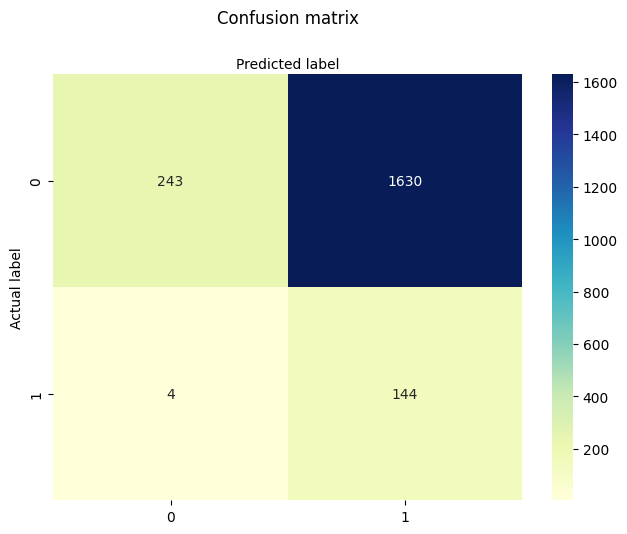

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall_balanced, precision_balanced , f1_balanced, accuracy_balanced, AUC_balanced)]

NB_balanced = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
NB_balanced.insert(0, 'NaiveBayes with ', 'Class weights')
NB_balanced

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
0,Class weights,0.972973,0.081172,0.149844,0.191489,0.551356


In [ ]:
import time
time_start = time.time()
np.int = int
best_model.fit(X_train, y_train)
time_model2 = time.time() - time_start
values_model2  = [ grid_search.best_score_, time_model2]
results_model2  = pd.DataFrame([values_model2], columns=['best_score', 'time'])
results_model2

,best_score,time
0,0.820253,0.016678


## **NAIVE BAYES UNDERSAMPLING**

Accuracy: 0.8861949529935675
Precision: 0.28421052631578947
Recall: 0.36486486486486486
F1-Score: 0.31952662721893493
F2-Score: 0.17106109324758842
AUC: 0.6461270400138527


Text(0.5, 427.9555555555555, 'Predicted label')

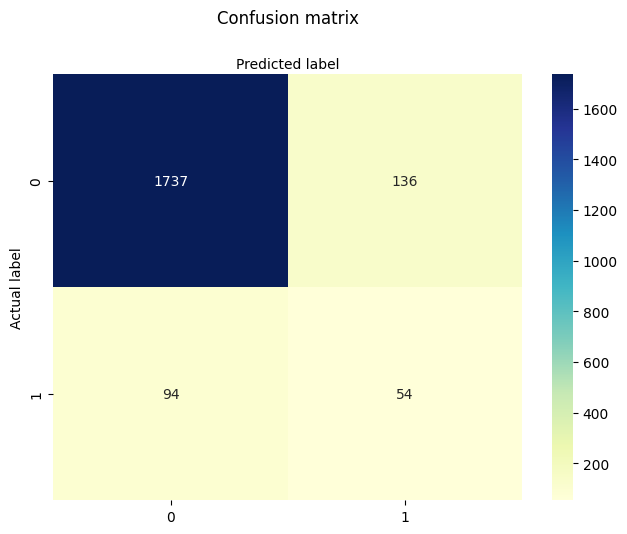

In [ ]:
# prompt: generar un modelo naive bayes con undersampling a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# 1. Aplicar Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# 2. Crear y entrenar el modelo Naive Bayes con los datos remuestreados
model_under = GaussianNB()

# 3. Optimizar hiperparámetros con GridSearchCV (aunque GaussianNB no tiene muchos hiperparámetros)
param_grid = {}  # Puedes agregar hiperparámetros si los hay
grid_search = GridSearchCV(estimator=model_under, param_grid=param_grid, scoring='recall', cv=10, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# 4. Obtener el mejor modelo y evaluar en el conjunto de prueba
best_model_under = grid_search.best_estimator_
y_pred_under = best_model_under.predict(X_test)

# 5. Calcular métricas
accuracy_under = accuracy_score(y_test, y_pred_under)
precision_under  = precision_score(y_test, y_pred_under)
recall_under  = recall_score(y_test, y_pred_under)
f1_under  = f1_score(y_test, y_pred_under)
f2_under  = 2 * (precision * recall) / (precision + recall)
AUC_under  = roc_auc_score(y_test, y_pred_under)

print(f"Accuracy: {accuracy_under }")
print(f"Precision: {precision_under }")
print(f"Recall: {recall_under }")
print(f"F1-Score: {f1_under }")
print(f"F2-Score: {f2_under }")
print(f"AUC: {AUC_under }")

# 6. Matriz de confusión
cm3 = confusion_matrix(y_test, y_pred_under)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# 7. Almacenar resultados en un DataFrame (opcional)
ndf = [(recall_under, precision_under, f1_under, accuracy_under, AUC_under)]
NB_undersampled = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'AUC'])
NB_undersampled.insert(0, 'NaiveBayes with ', 'Undersampling')
NB_undersampled

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
0,Undersampling,0.364865,0.284211,0.319527,0.886195,0.646127


In [ ]:
# 8. Medir el tiempo de entrenamiento (opcional)
time_start = time.time()
best_model.fit(X_resampled, y_resampled)
time_model3 = time.time() - time_start
values_model3 = [grid_search.best_score_, time_model3]
results_model3 = pd.DataFrame([values_model3], columns=['best_score', 'time'])
results_model3

,best_score,time
0,0.340606,0.05712


## **NAIVE BAYES OVERSAMPLING**

Accuracy: 0.21128154379020286
Precision: 0.08304498269896193
Recall: 0.972972972972973
F1-Score: 0.153028692879915
F2-Score: 0.17106109324758842
AUC: 0.5620337368869136


Text(0.5, 427.9555555555555, 'Predicted label')

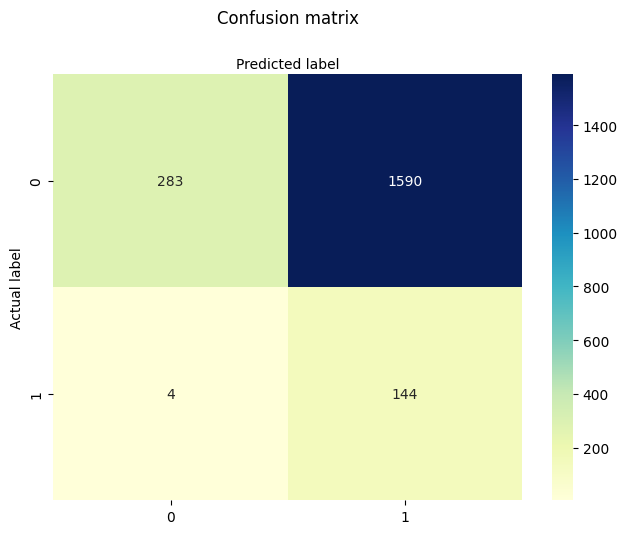

In [ ]:
# prompt: generar un modelo naive bayes con oversampling a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.over_sampling import RandomOverSampler

# 1. Aplicar Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 2. Crear y entrenar el modelo Naive Bayes con los datos remuestreados
model_over = GaussianNB()

# 3. Optimizar hiperparámetros con GridSearchCV (aunque GaussianNB no tiene muchos hiperparámetros)
param_grid = {}  # Puedes agregar hiperparámetros si los hay
grid_search = GridSearchCV(estimator=model_over, param_grid=param_grid, scoring='recall', cv=10, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# 4. Obtener el mejor modelo y evaluar en el conjunto de prueba
best_model_over = grid_search.best_estimator_
y_pred_over = best_model_over.predict(X_test)

# 5. Calcular métricas
accuracy_over = accuracy_score(y_test, y_pred_over)
precision_over = precision_score(y_test, y_pred_over)
recall_over = recall_score(y_test, y_pred_over)
f1_over = f1_score(y_test, y_pred_over)
f2_over = 2 * (precision * recall) / (precision + recall)
AUC_over = roc_auc_score(y_test, y_pred_over)

print(f"Accuracy: {accuracy_over}")
print(f"Precision: {precision_over}")
print(f"Recall: {recall_over}")
print(f"F1-Score: {f1_over}")
print(f"F2-Score: {f2_over}")
print(f"AUC: {AUC_over}")

# 6. Matriz de confusión
cm4 = confusion_matrix(y_test, y_pred_over)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# 7. Almacenar resultados en un DataFrame (opcional)
ndf = [(recall_over, precision_over, f1_over, accuracy_over, AUC_over)]
NB_oversampled = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'AUC'])
NB_oversampled.insert(0, 'NaiveBayes with ', 'Oversampling')
NB_oversampled

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
0,Oversampling,0.972973,0.083045,0.153029,0.211282,0.562034


In [ ]:
# 8. Medir el tiempo de entrenamiento (opcional)
time_start = time.time()
best_model.fit(X_resampled, y_resampled)
time_model4 = time.time() - time_start
values_model4 = [grid_search.best_score_, time_model4]
results_model4 = pd.DataFrame([values_model4], columns=['best_score', 'time'])
results_model4

,best_score,time
0,0.908125,0.020591


Accuracy: 0.15190499752597725
Precision: 0.07766990291262135
Recall: 0.972972972972973
F1-Score: 0.14385614385614387
F2-Score: 0.17106109324758842
AUC: 0.5299995671058138


Text(0.5, 427.9555555555555, 'Predicted label')

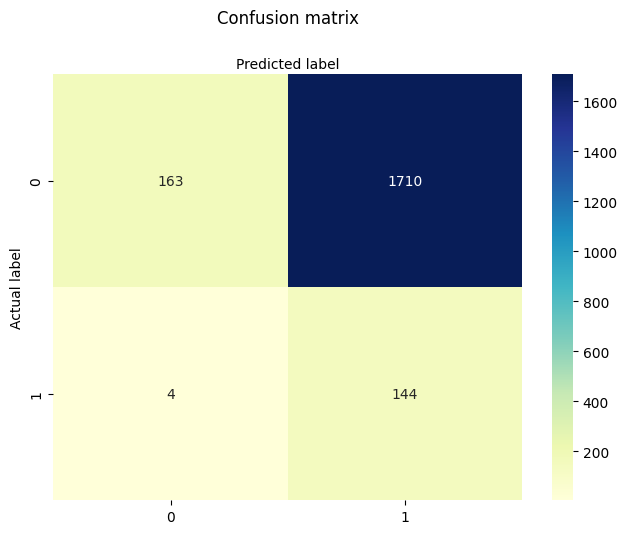

In [ ]:
# prompt: generar un modelo naive bayes con SMOTE a partir del data set X y y con optimizacion de hiperparametros con gridsearch

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Crear y entrenar el modelo Naive Bayes con los datos remuestreados
model_smote = GaussianNB()

# 3. Optimizar hiperparámetros con GridSearchCV (aunque GaussianNB no tiene muchos hiperparámetros)
param_grid = {}  # Puedes agregar hiperparámetros si los hay
grid_search = GridSearchCV(estimator=model_smote, param_grid=param_grid, scoring='recall', cv=10, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# 4. Obtener el mejor modelo y evaluar en el conjunto de prueba
best_model_smote = grid_search.best_estimator_
y_pred_smote = best_model_smote.predict(X_test)

# 5. Calcular métricas
accuracy_smote = accuracy_score(y_test, y_pred_smote )
precision_smote = precision_score(y_test, y_pred_smote )
recall_smote = recall_score(y_test, y_pred_smote )
f1_smote = f1_score(y_test, y_pred_smote )
f2_smote = 2 * (precision * recall) / (precision + recall)
AUC_smote = roc_auc_score(y_test, y_pred_smote )

print(f"Accuracy: {accuracy_smote}")
print(f"Precision: {precision_smote}")
print(f"Recall: {recall_smote}")
print(f"F1-Score: {f1_smote}")
print(f"F2-Score: {f2_smote}")
print(f"AUC: {AUC_smote}")

# 6. Matriz de confusión
cm5 = confusion_matrix(y_test, y_pred_smote)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# 7. Almacenar resultados en un DataFrame (opcional)
ndf = [(recall_smote, precision_smote, f1_smote, accuracy_smote, AUC_smote)]
NB_SMOTE = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'AUC'])
NB_SMOTE.insert(0, 'NaiveBayes with ', 'SMOTE')
NB_SMOTE

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
0,SMOTE,0.972973,0.07767,0.143856,0.151905,0.53


In [ ]:
# 8. Medir el tiempo de entrenamiento (opcional)
time_start = time.time()
best_model_smote.fit(X_resampled, y_resampled)
time_model5 = time.time() - time_start
values_model5 = [grid_search.best_score_, time_model5]
results_model5 = pd.DataFrame([values_model5], columns=['best_score', 'time'])
results_model5

,best_score,time
0,0.960124,0.021627


## **Comparacion metricas**

In [ ]:
predictions = pd.concat([model_NB, NB_balanced, NB_undersampled, NB_oversampled, NB_SMOTE], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,NaiveBayes with,Recall,Precision,F1 Score,Accuracy,AUC
1,Class weights,0.972973,0.081172,0.149844,0.191489,0.551356
3,Oversampling,0.972973,0.083045,0.153029,0.211282,0.562034
4,SMOTE,0.972973,0.077670,0.143856,0.151905,0.530000
0,None,0.898649,0.094527,0.171061,0.362197,0.609228
2,Undersampling,0.364865,0.284211,0.319527,0.886195,0.646127


## **Comparacion de tiempos**

In [ ]:
results_model1.loc[results_model1['time'] == results_model1.loc[0, 'time'], 'time'] = 0
results_combined = pd.concat([results_model1, results_model2, results_model3, results_model4, results_model5], ignore_index=True)
results_combined.index = ['No Under/Oversampling','Balanceado', 'Undersampling', 'OversamplingXG', 'SMOTE ']
results_combined.sort_values(by=['time'], ascending=True)

,best_score,time
No Under/Oversampling,0.820253,0.000000
Balanceado,0.820253,0.016678
OversamplingXG,0.908125,0.020591
SMOTE,0.960124,0.021627
Undersampling,0.340606,0.057120
